<a href="https://colab.research.google.com/github/BenWilliams2109/GM-Coursework-COMP0080/blob/main/3.%20Mean%20Field%20Approximation%20and%20Gibbs%20Sampling/Ising-Model-Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ising Model Inference

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Gx, Gy = 4, 4
neighbours = np.zeros((Gx*Gy,Gx*Gy))
states = np.arange(Gx*Gy).reshape((Gx, Gy), order="F").astype(int)

In [ ]:
for i in range(0, Gx):

    for j in range(0, Gy):

        if (i-1 >= 0) and (j < Gy):
            neighbours[states[i-1][j], states[i][j]] = 1

        if (i+1 < Gx) and (j < Gy):
            neighbours[states[i+1][j], states[i][j]] = 1

        if (j-1 >= 0) and (i < Gx):
            neighbours[states[i][j-1], states[i][j]] = 1

        if (j+1 < Gy) and (i < Gx):
            neighbours[states[i][j+1], states[i][j]] = 1

normed_neighbours = neighbours / np.sum(neighbours, axis=1)
rounded = np.round(neighbours, 2).astype(int)
print(rounded.astype(int))

[[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]


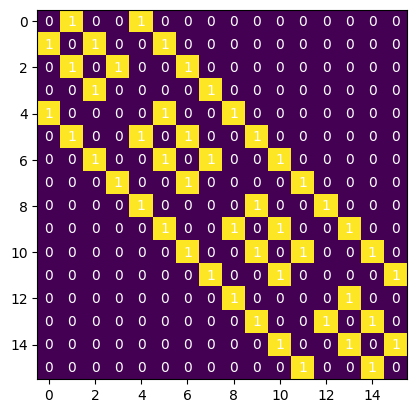

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(rounded)

for i in range(rounded.shape[0]):
    for j in range(rounded.shape[1]):
        text = ax.text(j, i, rounded[i, j],
        ha="center", va="center", color="w")

In [ ]:
v1 = np.array(([1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0 ,0, 0, 0]))
np.linalg.matrix_power(neighbours, 10) @ v1

array([ 5438.,     0.,  8095.,     0.,     0., 13220.,     0.,  7470.,
        8095.,     0., 11970.,     0.,     0.,  7470.,     0.,  4188.])

## Singly Connected Graph

> Here I am just trying to mess around with singly connected graphs to figure out message passing.



In [ ]:
# This just defines the given edge potential function in the Ising Model
def phi(x, y):
    # exp(beta*I(x==y))
    return np.exp((beta/4)*(x-y)**2)

In [ ]:
# Initial values
beta = 0.01
states = [-1, 1]
p = [1/3, 2/2]

def message_pass(length, edge_p):

    gammas = []
    back_prop = []

    gammas.append({
        "message": "p(2|1)*p(1)",
        "0": [np.exp(beta)*p[0], p[1]], # gamma_b(a=1)
        "1": [p[0], np.exp(beta)*p[1]] # gamma_b(a=-1)
    })

    # Normalisation
    norm = sum(gammas[-1]["0"]) + sum(gammas[-1]["1"])
    gammas[-1]["0"] = gammas[-1]["0"]/norm
    gammas[-1]["1"] = gammas[-1]["1"]/norm

    for i in range(1, length-1):

        gammas.append({
            "message": "p(" + str(i+2) + "|" + str(i+1) + ")*γ_" + str(i) + "(" + str(i+1) + ")",
            "0": [np.exp(beta)*np.max(gammas[i-1]["0"]), 1*np.max(gammas[i-1]["1"])],
            "1": [1*np.max(gammas[i-1]["0"]), np.exp(beta)*np.max(gammas[i-1]["1"])]
        })

        # Normalisation
        norm = sum(gammas[-1]["0"]) + sum(gammas[-1]["1"])
        gammas[-1]["0"] = gammas[-1]["0"]/norm
        gammas[-1]["1"] = gammas[-1]["1"]/norm

    # Backwards pass
    to_max = [np.max(gammas[-i]["0"]), np.max(gammas[-i]["1"])]
    back_prop.append(str(np.argmax(to_max)))

    for i in range(2, length):

        to_max = [np.max(gammas[-i][back_prop[i-2]]), np.max(gammas[-i][back_prop[i-2]])]
        back_prop.append(str(np.argmax(to_max)))

    for i in range(0, length-1):
        gammas[i]["0"] = np.round(gammas[i]["0"], 3)
        gammas[i]["1"] = np.round(gammas[i]["1"], 3)

    return gammas, back_prop

In [ ]:
g, b = message_pass(10, phi)

In [ ]:
g

[{'message': 'p(2|1)*p(1)',
  '0': array([0.126, 0.373]),
  '1': array([0.124, 0.377])},
 {'message': 'p(3|2)*γ_1(2)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(4|3)*γ_2(3)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(5|4)*γ_3(4)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(6|5)*γ_4(5)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(7|6)*γ_5(6)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(8|7)*γ_6(7)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(9|8)*γ_7(8)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])},
 {'message': 'p(10|9)*γ_8(9)',
  '0': array([0.25, 0.25]),
  '1': array([0.248, 0.253])}]

In [ ]:
# The optimal states at each stage, returned from 0,1 to +1,-1
-2*np.array([int(x) for x in b]) + 1

array([-1,  1,  1,  1,  1,  1,  1,  1,  1])

In [27]:
def get_nearest_neighbors(i, j, N):
    # only right and below neighbours to avoid double counting
    neighbors = []
    if i > 0:
        neighbors.append((i-1, j))
    if i < N-1:
        neighbors.append((i+1, j))
    if j > 0:
        neighbors.append((i, j-1))
    if j < N-1:
        neighbors.append((i, j+1))

    return neighbors

# Ising Model Mean Field Approximation

In [5]:
# Edge potential function in the Ising Model
def phi(x, y):
    # exp(beta*I(x==y))
    return np.exp((beta/4)*(x-y)**2)

In [17]:
# Initialise Ising Model
mrf = np.zeros((10, 10))
for i in range(mrf.shape[0]):
  for j in range(mrf.shape[1]):
    mrf[i, j] = np.random.choice([-1, 1])

mrf

array([[-1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.],
       [-1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.],
       [-1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.],
       [-1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.],
       [ 1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.],
       [ 1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.],
       [ 1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.]])

In [32]:
def initial_state(N):
    return np.random.choice([-1, 1], size=(N, N))
state = initial_state(10)
state

array([[ 1,  1, -1,  1,  1, -1, -1,  1, -1, -1],
       [ 1,  1,  1,  1, -1, -1,  1, -1, -1, -1],
       [ 1,  1, -1,  1, -1,  1, -1,  1, -1, -1],
       [ 1,  1,  1, -1,  1,  1,  1,  1, -1,  1],
       [ 1,  1,  1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1, -1, -1,  1, -1, -1, -1, -1,  1],
       [ 1,  1,  1, -1, -1, -1,  1, -1,  1,  1],
       [-1, -1, -1,  1,  1,  1, -1,  1, -1,  1],
       [-1, -1,  1,  1,  1, -1,  1,  1,  1,  1],
       [ 1,  1,  1, -1,  1, -1,  1, -1,  1, -1]])

In [18]:
def potential_grid(beta):
    return np.exp(beta * np.eye(2))

In [26]:
potentials = potential_grid(1)

In [21]:
p_tilde = np.prod(potential_grid(1))

In [23]:
p = p_tilde / (p_tilde + 1)
p

0.8807970779778825

In [25]:
N = 10
test = np.random.choice([-1, 1], size=(N, N))

In [33]:
nn_potentials = []
for n in get_nearest_neighbors(2, 2, N):
  nn_potentials.append(potentials[state[i, j], state[n[0], n[1]]])

In [34]:
nn_potentials

[2.718281828459045, 2.718281828459045, 2.718281828459045, 2.718281828459045]

In [35]:
state

array([[ 1,  1, -1,  1,  1, -1, -1,  1, -1, -1],
       [ 1,  1,  1,  1, -1, -1,  1, -1, -1, -1],
       [ 1,  1, -1,  1, -1,  1, -1,  1, -1, -1],
       [ 1,  1,  1, -1,  1,  1,  1,  1, -1,  1],
       [ 1,  1,  1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1, -1, -1,  1, -1, -1, -1, -1,  1],
       [ 1,  1,  1, -1, -1, -1,  1, -1,  1,  1],
       [-1, -1, -1,  1,  1,  1, -1,  1, -1,  1],
       [-1, -1,  1,  1,  1, -1,  1,  1,  1,  1],
       [ 1,  1,  1, -1,  1, -1,  1, -1,  1, -1]])

In [37]:
import random
def gibbs_sampling(max_iter=10000, burn_in=1000, beta=1.0, N=10):

    # initialise the state
    state = initial_state(N)
    initial = state.copy()

    p_list = []

    potentials = potential_grid(beta)

    samples = []
    for _ in range(max_iter):
        flip_count = 0
        for i in range(N):
            for j in range(N):
                # compute the conditional probability
                # p(x_ij = 1 | x_-ij) proportional to product of NN potentials
                nn_potentials = []
                for n in get_nearest_neighbors(i, j, N):
                    nn_potentials.append(potentials[state[i, j], state[n[0], n[1]]])
                p_tilde = np.prod(nn_potentials)
                # normalise
                p = p_tilde / (p_tilde + 1)
                p_list.append(p)
                # sample from the conditional distribution
                new_state = np.random.choice([-1, 1], p=[1-p, p])
                # if state flips update the state and flip count
                if new_state != state[i, j]:
                    flip_count += 1
                    state[i, j] = new_state
        # store the state
        samples.append(state.copy())
        # if no state flips in the last iteration break - fully converged
        if len(samples) > burn_in and flip_count == 0:
            break

    return samples[burn_in:], initial, p_list

In [54]:
samples, initial, p = gibbs_sampling(max_iter=1000, burn_in=100, beta=1, N=10)

In [55]:
p[1]

0.9525741268224333

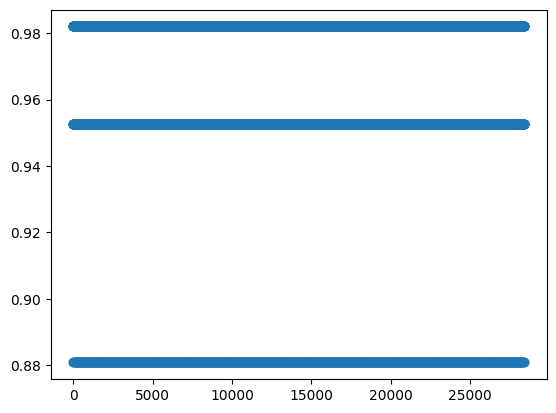

In [56]:
plt.scatter(np.linspace(1, len(p), len(p)), p)

In [59]:
samples[-1]

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])